In [65]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from src.roc import plot_roc

import warnings
warnings.filterwarnings('ignore')

In [66]:
# 1. Load the dataset in with pandas
df = pd.read_csv('./data/churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [67]:
# 2. Convert the "no", "yes" values to booleans (True/False)
df["Int'l Plan"] = df["Int'l Plan"] == 'yes'
df["VMail Plan"] = df["VMail Plan"] == 'yes'
df['Churn?'] = df['Churn?'] == 'True.'
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [68]:
# 3. Remove the features which aren't continuous or boolean
df.pop('State')
df.pop('Area Code')
df.pop('Phone')
df.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [69]:
# 4. Make a numpy array called y containing the churn values
y = df.pop('Churn?')

In [70]:
# 5. Make a 2 dimensional numpy array containing the feature data (everything except the labels)
X = df

In [71]:
# 6. Use sklearn's train_test_split to split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [72]:
# 7. Use sklearn's RandomForestClassifier to build a model of your data
rf = RandomForestClassifier().fit(X_train, y_train)

In [73]:
# 8. What is the accuracy score on the test data?
print("8. score:", rf.score(X_test, y_test))

8. score: 0.9388489208633094


In [74]:
# 9. Draw a confusion matrix for the results
y_predict = rf.predict(X_test)
print("9. confusion matrix:")
print(confusion_matrix(y_test, y_predict))

9. confusion matrix:
[[713   5]
 [ 46  70]]


In [75]:
# 10. What is the precision? Recall?
print("10. precision:", precision_score(y_test, y_predict))
print("    recall:", recall_score(y_test, y_predict))

10. precision: 0.9333333333333333
    recall: 0.603448275862069


In [76]:
# 11. Build the RandomForestClassifier again setting the out of bag parameter to be true
rf = RandomForestClassifier(n_estimators=30, oob_score=True)
rf.fit(X_train, y_train)
print("11: accuracy score:", rf.score(X_test, y_test))
print("    out of bag score:", rf.oob_score_)

11: accuracy score: 0.9544364508393285
    out of bag score: 0.9427771108443377


In [77]:
# 12. Use sklearn's model to get the feature importances
feature_importances = np.argsort(rf.feature_importances_)[::-1]
print("12: top five:", list(df.columns[feature_importances[:5]]))

12: top five: ['Day Charge', 'Day Mins', 'CustServ Calls', "Int'l Plan", 'Eve Charge']


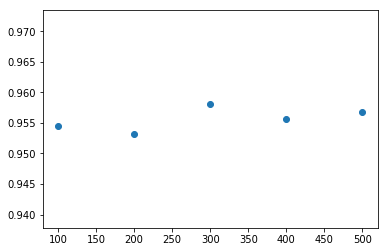

In [78]:
# 13. Try modifying the number of trees.
trees, accs = [], []
for i in range(1, 6):
    tree = RandomForestClassifier(n_estimators=100 * i).fit(X_train, y_train)
    acc  = accuracy_score(y_test, tree.predict(X_test))
    trees.append(100 * i)
    accs.append(acc)
plt.scatter(trees, accs)
plt.show()

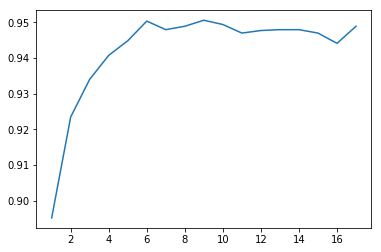

In [79]:
# 14. Try modifying the max features parameter
num_features = range(1, len(df.columns) + 1)
accuracies = []
for n in num_features:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(max_features=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
plt.plot(num_features, accuracies)
plt.show()

In [80]:
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print("15. Model, Accuracy, Precision, Recall")
print("    Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=25, max_features=5))
print("    Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test))
print("    Decision Tree:", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))
print("    Naive Bayes:", get_scores(MultinomialNB, X_train, X_test, y_train, y_test))

15. Model, Accuracy, Precision, Recall
    Random Forest: (0.9520383693045563, 0.9318181818181818, 0.7068965517241379)
    Logistic Regression: (0.8669064748201439, 0.5757575757575758, 0.16379310344827586)
    Decision Tree: (0.9088729016786571, 0.6694915254237288, 0.6810344827586207)
    Naive Bayes: (0.6366906474820144, 0.20317460317460317, 0.5517241379310345)


16. Use the included `plot_roc` function to visualize the roc curve of each model


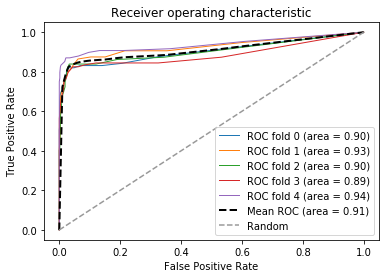

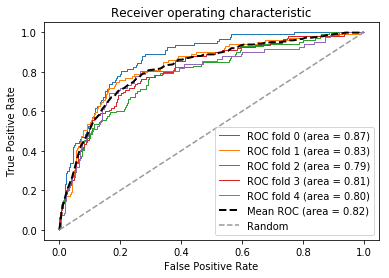

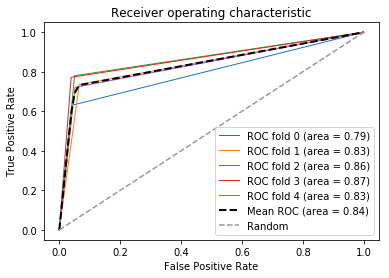

In [81]:
print("16. Use the included `plot_roc` function to visualize the roc curve of each model")
plot_roc(X, y, RandomForestClassifier, 'Random_Forest', n_estimators=25, max_features=5)
plot_roc(X, y, LogisticRegression, 'Logistic_Regrssion')
plot_roc(X, y, DecisionTreeClassifier, 'Decision_Tree')

0 Intl Mins 0.1502338818060998
1 Int'l Plan 0.12609300017968053
2 VMail Plan 0.10214821566510976
3 Night Calls 0.08871250094014985
4 Day Mins 0.08582765703090012
5 Intl Charge 0.07881375344091701
6 Day Calls 0.058131457044667434
7 Eve Mins 0.05771352321761384
8 Intl Calls 0.051660424849758656
9 Eve Calls 0.03700949749980185


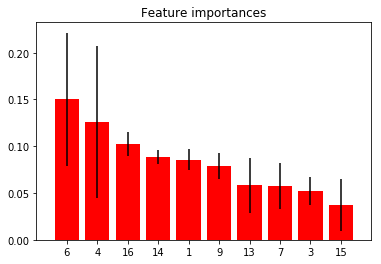

In [82]:
# 17. Calculate the standard deviation for feature importances across all trees

std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(rf.feature_importances_)[::-1]
features = list(df.columns[indices])

for i in range(10):
    print(i, features[indices[i]], rf.feature_importances_[indices[i]])

plt.figure()
plt.title("Feature importances")
plt.bar(range(10), rf.feature_importances_[indices][:10], yerr=std[indices][:10], color="r", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()